In [339]:
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score
import scipy.stats as sps # for mean comparison

from sklearn.preprocessing import RobustScaler
import sklearn

In [362]:
df_original = pd.read_csv("full_data.csv", encoding="latin")

df = df_original[['ward', 'median_household_income_estimate_2012_13', 'median_household_income_estimate_2012_13_pow', '%_bame_2011', '%_all_older_people_aged_65_2015', 'turnout_at_mayoral_election_2012']]
df

# # filter out E05000637 (westminister with income outlier at 88330.0)
# df=df.drop(df[df['ward'] == 'E05000637'].index)
# df.tail(15)

# is median houshold income something that should be normalised?

,ward,median_household_income_estimate_2012_13,median_household_income_estimate_2012_13_pow,%_bame_2011,%_all_older_people_aged_65_2015,turnout_at_mayoral_election_2012
0,E05000026,33920.0,0.000029,71.9,5.0,25.7
1,E05000027,32470.0,0.000031,29.9,10.0,20.3
2,E05000028,33000.0,0.000030,41.2,8.7,22.5
3,E05000029,33920.0,0.000029,37.9,14.2,25.3
4,E05000030,37400.0,0.000027,24.8,14.2,24.1
...,...,...,...,...,...,...
619,E05000645,47340.0,0.000021,21.8,14.9,40.2
620,E05000646,46550.0,0.000021,29.3,12.6,37.8
621,E05000647,50250.0,0.000020,24.0,12.1,36.8
622,E05000648,32390.0,0.000031,52.8,9.0,29.6


In [341]:
# convert % bame to % white

df['%_white_2011'] = 100 - df['%_bame_2011']
df

,ward,median_household_income_estimate_2012_13,median_household_income_estimate_2012_13_pow,%_bame_2011,%_all_older_people_aged_65_2015,turnout_at_mayoral_election_2012,%_white_2011
0,E05000026,33920.0,0.000029,71.9,5.0,25.7,28.1
1,E05000027,32470.0,0.000031,29.9,10.0,20.3,70.1
2,E05000028,33000.0,0.000030,41.2,8.7,22.5,58.8
3,E05000029,33920.0,0.000029,37.9,14.2,25.3,62.1
4,E05000030,37400.0,0.000027,24.8,14.2,24.1,75.2
...,...,...,...,...,...,...,...
619,E05000645,47340.0,0.000021,21.8,14.9,40.2,78.2
620,E05000646,46550.0,0.000021,29.3,12.6,37.8,70.7
621,E05000647,50250.0,0.000020,24.0,12.1,36.8,76.0
622,E05000648,32390.0,0.000031,52.8,9.0,29.6,47.2


<AxesSubplot:xlabel='%_white_2011', ylabel='turnout_at_mayoral_election_2012'>

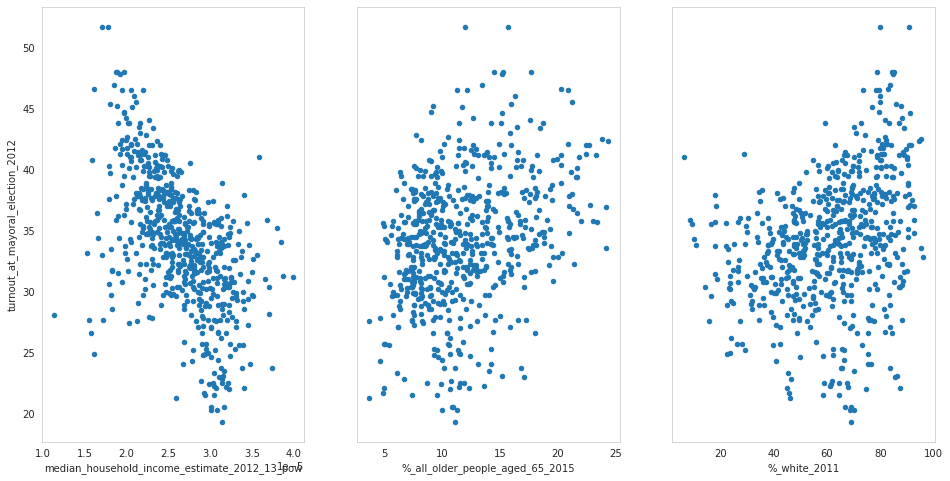

In [342]:
%matplotlib inline
# ax = df.plot.scatter(x = 'median_household_income_estimate_2012_13', y = 'turnout_at_mayoral_election_2012')
# ax.set_xlabel("income")
# ax.set_ylabel("turnout at mayoral election")
# ax.set_title("Scatter plot of turnout ~ income ")

fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='median_household_income_estimate_2012_13_pow', y='turnout_at_mayoral_election_2012', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='%_all_older_people_aged_65_2015', y='turnout_at_mayoral_election_2012', ax=axs[1])
df.plot(kind='scatter', x='%_white_2011', y='turnout_at_mayoral_election_2012', ax=axs[2])

In [343]:
# do you need to do min-max normalisation on columns that are percentages? prolly not
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

# do u need to normalise after log transformation? no, log transforming is a type of normalisation?
# wait wait wait...is log transformation just for when finding linear relationship? while for clustering we would only need to rescale?
normalised_df = df.copy()
normalised_df['median_household_income_estimate_2012_13'] = mms.fit_transform(df['median_household_income_estimate_2012_13'].values.reshape(-1,1))*100
normalised_df=normalised_df.round(1)
normalised_df

,ward,median_household_income_estimate_2012_13,median_household_income_estimate_2012_13_pow,%_bame_2011,%_all_older_people_aged_65_2015,turnout_at_mayoral_election_2012,%_white_2011
0,E05000026,14.0,0.0,71.9,5.0,25.7,28.1
1,E05000027,11.7,0.0,29.9,10.0,20.3,70.1
2,E05000028,12.5,0.0,41.2,8.7,22.5,58.8
3,E05000029,14.0,0.0,37.9,14.2,25.3,62.1
4,E05000030,19.5,0.0,24.8,14.2,24.1,75.2
...,...,...,...,...,...,...,...
619,E05000645,35.2,0.0,21.8,14.9,40.2,78.2
620,E05000646,33.9,0.0,29.3,12.6,37.8,70.7
621,E05000647,39.8,0.0,24.0,12.1,36.8,76.0
622,E05000648,11.5,0.0,52.8,9.0,29.6,47.2


In [344]:
X = normalised_df.drop(['ward', '%_bame_2011', 'median_household_income_estimate_2012_13_pow'], axis=1)
X.head()

,median_household_income_estimate_2012_13,%_all_older_people_aged_65_2015,turnout_at_mayoral_election_2012,%_white_2011
0,14.0,5.0,25.7,28.1
1,11.7,10.0,20.3,70.1
2,12.5,8.7,22.5,58.8
3,14.0,14.2,25.3,62.1
4,19.5,14.2,24.1,75.2


In [345]:
X.corr()

,median_household_income_estimate_2012_13,%_all_older_people_aged_65_2015,turnout_at_mayoral_election_2012,%_white_2011
median_household_income_estimate_2012_13,1.000000,0.338579,0.510246,0.588705
%_all_older_people_aged_65_2015,0.338579,1.000000,0.327602,0.561248
turnout_at_mayoral_election_2012,0.510246,0.327602,1.000000,0.320853
%_white_2011,0.588705,0.561248,0.320853,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

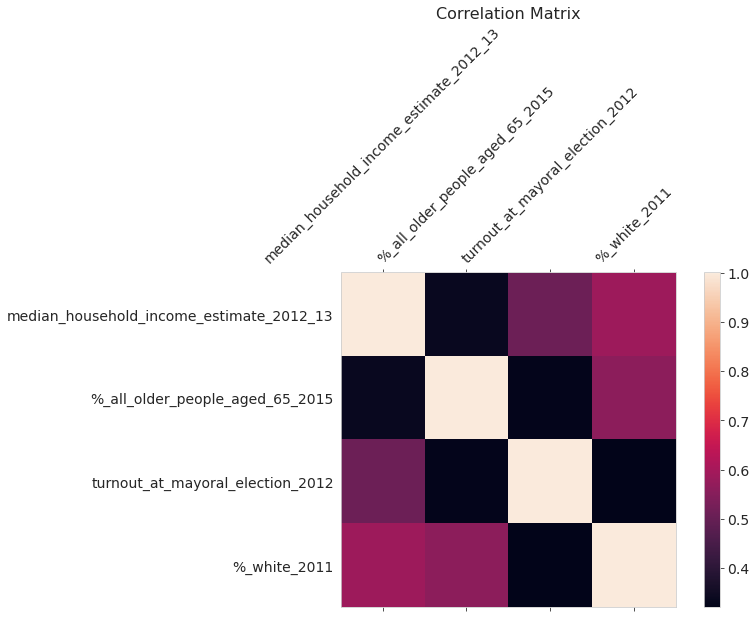

In [346]:
f = plt.figure(figsize=(10, 6))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# % white and median income are highly correlated, is this multicolinearity?
# Multicollinearity is a situation where two or more predictors are highly linearly related. 
# In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the 
# presence of multicollinearity.

In [347]:
# get silohuette score
random_state_seed = 10
df_silhouette_score = pd.DataFrame({'n_cluster':[2,3,4,5,6], 'silhouette_score':[0,0,0,0,0]})
inertia_values = []
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters=n_clusters, random_state=random_state_seed).fit(X)
    cluster_labels = clusterer.labels_
    inertia_values.append(clusterer.inertia_)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklm.silhouette_score(X, cluster_labels)
    print(
        "For n =",
        n_clusters,
        "silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg

For n = 2 silhouette_score is : 0.45248959929189825
For n = 3 silhouette_score is : 0.35660380069516096
For n = 4 silhouette_score is : 0.33725032216583456
For n = 5 silhouette_score is : 0.32121397015341
For n = 6 silhouette_score is : 0.3129853592503684


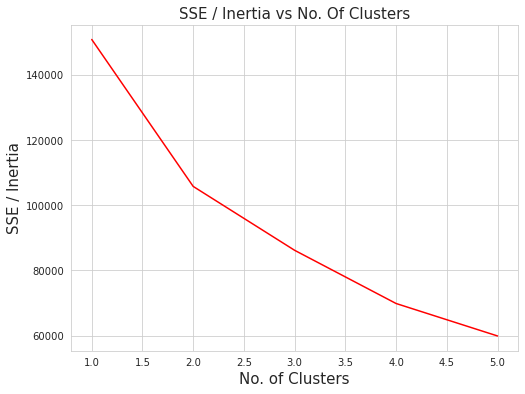

In [348]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 6), inertia_values, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
# plt.savefig('sse_elbow_plot.png', dpi=300, transparent=True)

plt.show()

In [349]:
num_clusters = 2 # from silohuette score

# we fix the random_state so that the kmeans result is reproducible
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(X)

# Sanity check
print(kmeans_output)

KMeans(n_clusters=2, random_state=100)


In [350]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# You can print the clustering IDs to get an ordered list of labels
print(clustering_ids_kmeans)

[0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 1 1 1 1 

In [351]:
df_with_labels = X.assign(cluster_id = clustering_ids_kmeans)
df_with_labels

,median_household_income_estimate_2012_13,%_all_older_people_aged_65_2015,turnout_at_mayoral_election_2012,%_white_2011,cluster_id
0,14.0,5.0,25.7,28.1,0
1,11.7,10.0,20.3,70.1,1
2,12.5,8.7,22.5,58.8,0
3,14.0,14.2,25.3,62.1,0
4,19.5,14.2,24.1,75.2,1
...,...,...,...,...,...
619,35.2,14.9,40.2,78.2,1
620,33.9,12.6,37.8,70.7,1
621,39.8,12.1,36.8,76.0,1
622,11.5,9.0,29.6,47.2,0


/tmp/ipykernel_7269/3874228010.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # Method 1


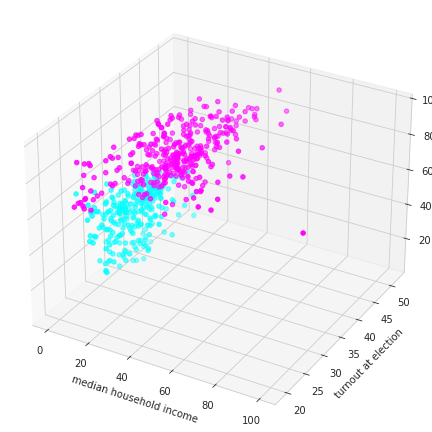

In [352]:
%matplotlib widget
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = df_with_labels['median_household_income_estimate_2012_13']
y = df_with_labels['turnout_at_mayoral_election_2012']
z = df_with_labels['%_white_2011']

ax.scatter(x, y, z, c=df_with_labels['cluster_id'], cmap='cool', marker='o') # ['#67f075','#67f075']
ax.set_title('why doesnt this work')
ax.set_xlabel('median household income')
ax.set_ylabel('turnout at election')
ax.set_zlabel('% white')

plt.show()

# what do u do with the cluster analysis? maybe look at the data for each label and determine the similar factors
# maybe get the middle points for each cluster and compare them -- yes. actually the middle values for each feature in each cluster 
# https://developer.squareup.com/blog/so-you-have-some-clusters-now-what/


# spread of income + whiteness cluster

# low income + low whiteness 

# both have cpread of turn out

cluster0 = df_with_labels[df_with_labels['cluster_id'] == 0]

#means
means_cluster_0 = []
means_cluster_0.append(cluster0['median_household_income_estimate_2012_13'].mean())
means_cluster_0.append(cluster0['%_all_older_people_aged_65_2015'].mean())
means_cluster_0.append(cluster0['%_white_2011'].mean())
means_cluster_0.append(cluster0['turnout_at_mayoral_election_2012'].mean())

means_cluster_0


In [353]:
cluster1 = df_with_labels[df_with_labels['cluster_id'] == 1]

#means
means_cluster_1 = []
means_cluster_1.append(cluster1['median_household_income_estimate_2012_13'].mean())
means_cluster_1.append(cluster1['%_all_older_people_aged_65_2015'].mean())
means_cluster_1.append(cluster1['%_white_2011'].mean())
means_cluster_1.append(cluster1['turnout_at_mayoral_election_2012'].mean())

means_cluster_1

[28.49470752089135, 13.615598885793867, 74.53732590529245, 35.71169916434543]

In [354]:
# cluster2 = df_with_labels[df_with_labels['cluster_id'] == 2]

# #means
# means_cluster_2 = []
# means_cluster_2.append(cluster2['median_household_income_estimate_2012_13'].mean())
# means_cluster_2.append(cluster2['%_all_older_people_aged_65_2015'].mean())
# means_cluster_2.append(cluster2['%_white_2011'].mean())
# means_cluster_2.append(cluster2['turnout_at_mayoral_election_2012'].mean())

# means_cluster_2

In [355]:
features = ['median_household_income_estimate_2012_13', '%_all_older_people_aged_65_2015', '%_white_2011', 'turnout_at_mayoral_election_2012']

means = {"cluster 1 means": means_cluster_0, "cluster 2 means": means_cluster_1}
df = pd.DataFrame(means, columns=["cluster 1 means", "cluster 2 means"], index=['income', '% older', '% white', '% turnout'])
df

,cluster 1 means,cluster 2 means
income,14.024528,28.494708
% older,9.321887,13.615599
% white,43.204906,74.537326
% turnout,31.997358,35.711699


<AxesSubplot:title={'center':'Mean comparision for clusters'}>

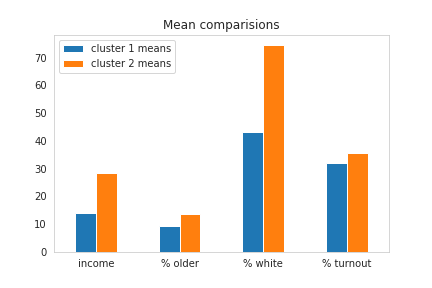

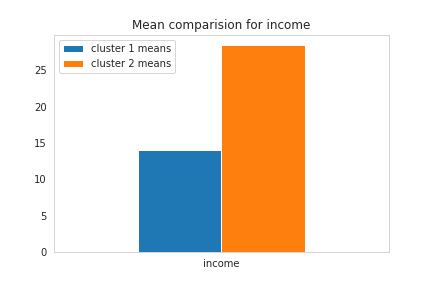

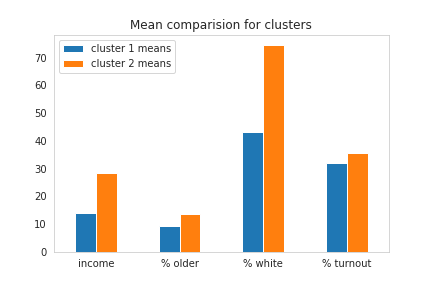

In [356]:
# how can i show bar charts with very different scales 

df.plot.bar(rot=0, title="Mean comparisions")

df_income = df.copy()
df_income = df_income.drop(['% older', '% white', '% turnout'])
df_income.plot.bar(rot=0, title="Mean comparision for income")

df_no_income = df.copy()
df_no_income.drop(['income'])
df_no_income.plot.bar(rot=0, title="Mean comparision for clusters")


In [357]:
#mean comparisons

for f in features:
    std0 = cluster0[f].std()
    std1 = cluster1[f].std()

    std_ratio = std0/std1

    print("for: ", f)
    print("std_ratio =", std_ratio)

    if std_ratio > 0.5 and std_ratio < 2:
        print("Can assume equal population standard deviations.")
        equal_stds = True
    else:
        print("Cannot assume equal population standard deviations.")
        equal_stds = False

    test_stat, p_value = sps.ttest_ind(cluster0[f], cluster1[f], equal_var = equal_stds)
    print("test_stat =", test_stat)
    print("p-value =", p_value)
    print("significant? ", p_value < 0.05)
    
    print('\n')


for:  median_household_income_estimate_2012_13
std_ratio = 0.5068439356032661
Can assume equal population standard deviations.
test_stat = -19.304169595101378
p-value = 2.042302269855781e-65
significant?  True


for:  %_all_older_people_aged_65_2015
std_ratio = 0.6219563317988847
Can assume equal population standard deviations.
test_stat = -14.32206080223094
p-value = 2.043291456443542e-40
significant?  True


for:  %_white_2011
std_ratio = 1.3509045147474124
Can assume equal population standard deviations.
test_stat = -35.606043785319876
p-value = 3.128844414095443e-152
significant?  True


for:  turnout_at_mayoral_election_2012
std_ratio = 0.7042422985870692
Can assume equal population standard deviations.
test_stat = -9.146233057485615
p-value = 8.3125098829329415e-19
significant?  True




maybe it's a given that the means would be significantly different already. so what can we make of these clusters then? how do you analyse them?

whats a good silouette score for cluster analysis?

ask if it even makes sense to make normally distributed by transforming to power of -1. and also if so...what does this even mean in terms of the relationship?
should we omit the income outliers and use the log distribution?

In [359]:
import statsmodels.formula.api as smf
reg_income_turnout = smf.ols(formula='turnout_at_mayoral_election_2012 ~ median_household_income_estimate_2012_13',data=normalised_df).fit()

# And this gives a big summary of the results:
print(reg_income_turnout.summary())



                                   OLS Regression Results                                   
Dep. Variable:     turnout_at_mayoral_election_2012   R-squared:                       0.260
Model:                                          OLS   Adj. R-squared:                  0.259
Method:                               Least Squares   F-statistic:                     218.9
Date:                              Mon, 12 Dec 2022   Prob (F-statistic):           1.15e-42
Time:                                      14:32:35   Log-Likelihood:                -1835.8
No. Observations:                               624   AIC:                             3676.
Df Residuals:                                   622   BIC:                             3684.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                               coef    std err        

In [363]:

reg_log_income_turnout = smf.ols(formula='turnout_at_mayoral_election_2012 ~ median_household_income_estimate_2012_13_log',data=df_original).fit()

# And this gives a big summary of the results:
print(reg_log_income_turnout.summary())

                                   OLS Regression Results                                   
Dep. Variable:     turnout_at_mayoral_election_2012   R-squared:                       0.293
Model:                                          OLS   Adj. R-squared:                  0.292
Method:                               Least Squares   F-statistic:                     258.1
Date:                              Mon, 12 Dec 2022   Prob (F-statistic):           7.87e-49
Time:                                      14:38:16   Log-Likelihood:                -1821.6
No. Observations:                               624   AIC:                             3647.
Df Residuals:                                   622   BIC:                             3656.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                                   coef    std err    

In [379]:
np.seterr(divide = 'ignore') 
df_original['median_household_income_estimate_2012_13_log_standard'] = np.log(normalised_df['median_household_income_estimate_2012_13'])
df_original

,Unnamed: 0,ward,borough,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,median_household_income_estimate_2012_13,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,...,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised,median_household_income_estimate_2012_13_log,median_household_income_estimate_2012_13_pow,median_household_income_estimate_2012_13_log_standard
0,1,E05000026,Barking and Dagenham,25.7,173000.0,33920.0,80.2,83.9,21.9,0.8,...,138.1,71.9,5.0,98.0,2.0,0.996498,1.005313,10.431760,0.000029,2.639057
1,2,E05000027,Barking and Dagenham,7.9,215000.0,32470.0,77.2,80.6,20.6,1.0,...,73.6,29.9,10.0,28.0,72.0,0.957303,0.967708,10.388072,0.000031,2.459589
2,3,E05000028,Barking and Dagenham,10.5,210000.0,33000.0,79.0,79.3,1.9,1.6,...,79.9,41.2,8.7,83.0,17.0,0.941863,0.990271,10.404263,0.000030,2.525729
3,4,E05000029,Barking and Dagenham,6.5,240500.0,33920.0,79.2,82.2,56.0,1.2,...,76.1,37.9,14.2,36.0,64.0,0.976306,0.992778,10.431760,0.000029,2.639057
4,5,E05000030,Barking and Dagenham,4.5,240000.0,37400.0,77.1,81.1,50.4,1.6,...,66.7,24.8,14.2,100.0,0.0,0.963242,0.966455,10.529426,0.000027,2.970414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,E05000645,Westminster,15.1,715650.0,47340.0,83.3,84.3,32.4,5.9,...,57.7,21.8,14.9,0.0,100.0,1.001249,1.044172,10.765111,0.000021,3.561046
620,621,E05000646,Westminster,17.0,840000.0,46550.0,80.0,85.1,26.4,4.3,...,82.4,29.3,12.6,59.0,41.0,1.010750,1.002806,10.748282,0.000021,3.523415
621,622,E05000647,Westminster,15.9,857250.0,50250.0,80.7,88.5,4.0,5.9,...,138.1,24.0,12.1,69.0,31.0,1.051133,1.011581,10.824766,0.000020,3.683867
622,623,E05000648,Westminster,24.1,499975.0,32390.0,75.1,81.6,19.2,5.1,...,75.5,52.8,9.0,87.0,13.0,0.969180,0.941384,10.385605,0.000031,2.442347


In [378]:
reg_log_standard_income_turnout = smf.ols(formula='turnout_at_mayoral_election_2012 ~ median_household_income_estimate_2012_13_log_standard',data=df_original).fit()

# And this gives a big summary of the results:
print(reg_log_standard_income_turnout.summary())

LinAlgError: SVD did not converge